Importing and File Location

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


#creating Paths
path= r'C:\Users\wjzak\Dropbox\Career Foundry\Data Immersion\Module 4- Python Fundamentals for Data Analysts\07-2025 Instacart Basket Analysis'

#using the path to pull prepared data
full_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [3]:
full_merge.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies      61.0           19.0     5.8   
1           1  Chocolate Sandwich Cookies      61.0           19.0     5.8   
2           1  Chocolate Sandwich Cookies      61.0           19.0     5.8   
3           1  Chocolate Sandwich Cookies      61.0           19.0     5.8   
4           1  Chocolate Sandwich Cookies      61.0           19.0     5.8   

    order_id  user_id eval_set  order_number  orders_day_of_week  ...  \
0  3139998.0      138    prior          28.0                 6.0  ...   
1  1977647.0      138    prior          30.0                 6.0  ...   
2   389851.0      709    prior           2.0                 0.0  ...   
3   652770.0      764    prior           1.0                 3.0  ...   
4  1813452.0      764    prior           3.0                 4.0  ...   

      frequency_flag  First Name  Last Name  Gender      State Age  \
0  Frequent customer     Charles        Cox    Male  Minnesota  81   
1  Frequent customer     Charles        Cox    Male  Minnesota  81   
2  Frequent customer     Deborah      Glass  Female    Vermont  66   
3  Frequent customer     Heather      Myers  Female  Wisconsin  40   
4  Frequent customer     Heather      Myers  Female  Wisconsin  40   

  Date Joined Number of Dependents  Martial Status  Income  
0    8/1/2019                    1         married   49620  
1    8/1/2019                    1         married   49620  
2   6/16/2018                    2         married  158302  
3    2/9/2020                    3         married   31308  
4    2/9/2020                    3         married   31308  

[5 rows x 33 columns]

NOTE: Exercise code can be found in file for Exercise 4.9 included in zip

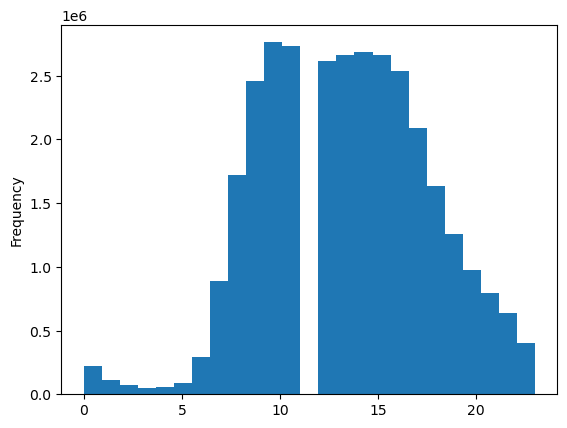

In [15]:
#create histogram for the time of day orders are created
hist = full_merge['order_hour_of_day'].plot.hist(bins = 25)

The histogram above shows that the majority of the sales data on Instacart are from 8:00am to 5:00pm. The early morning hours have little to no activity and oddly there is no activity for 12p/Noon as well- this may have been removed at some point but I can assume this data shows the same trend here. 

Overall, stores are busy between 8a-5pm- with no activity overnight. This likely because most stores are not open overnight to fulfill these orders.

In [14]:
#this comand saves the figure listed
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_hist.png'))

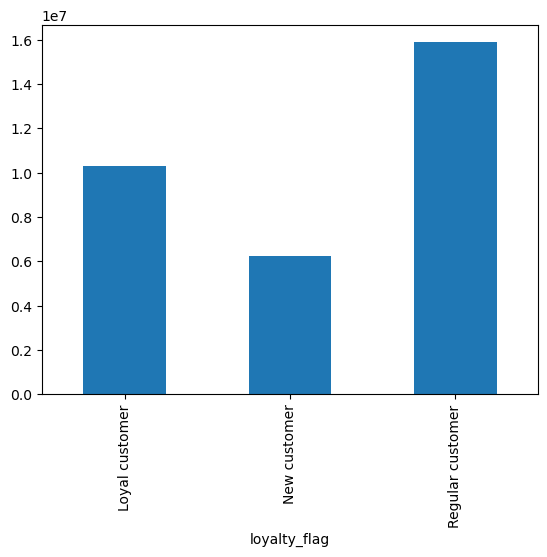

In [22]:
#creates a bar chart for loyalty flag
bar = full_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

Regular customers are the most common and complet the most orders. The count on the left adds 7 0's to the number showing that loyal customers make up about 1 million orders while regular customers are closer to 1.6 million.

In [23]:
#this comand saves the figure listed
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_bar.png'))

In [37]:
#sets a specific seed for reproducing this outcome
np.random.seed(4)
#setting length to 80% here so I can work with just 20% of the sample
dev = np.random.rand(len(full_merge)) <= 0.8

In [38]:
#stores 80% of the df under big
big = full_merge[dev]

In [39]:
#stores 20% of the df under small
small = full_merge[~dev]

In [40]:
#reduces df even further to loyalty and prices
df_2 = small[['order_hour_of_day','prices']]

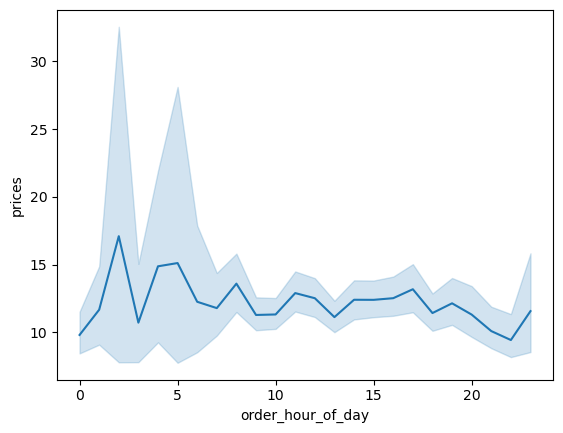

In [41]:
#compare order hour of day and prices in a line chart
line_oxp = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

The data above shows that the items purchased overnight were actually quite expensive. These overnight purchases were much more costly than the information found at the remainder of the timeframes purchased. There was also more expensive products purchased at the beginning of the day.

In [44]:
#this comand saves the figure listed above
line_oxp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_line_hour_price.png'))

In [45]:
#reduces df even further to martial status, age, and number of dependents
df_3 = small[['Martial Status','Age', 'Number of Dependents']]

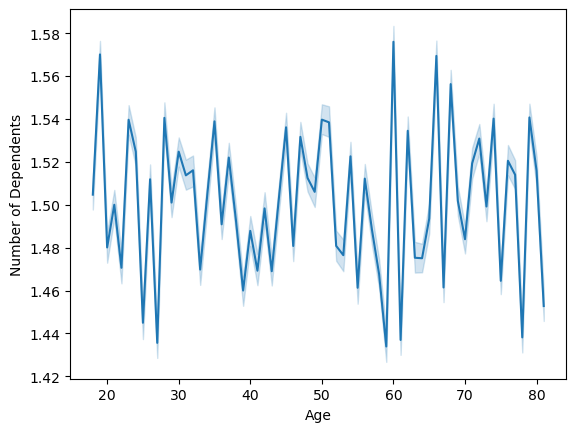

In [43]:
#compare age and dependents
line_axd = sns.lineplot(data = df_3, x = 'Age',y = 'Number of Dependents')

This graph shows that the number of dependents varies between 1.4 to 1.6 for all of those using the app. This is likely skewed slightly cause of the sheer volume of users in this sample tested. There are likely people who do not have children but the majority have at least 1-2 children.

In [46]:
#this comand saves the figure listed above
line_axd.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_line_Age_Dependent.png'))

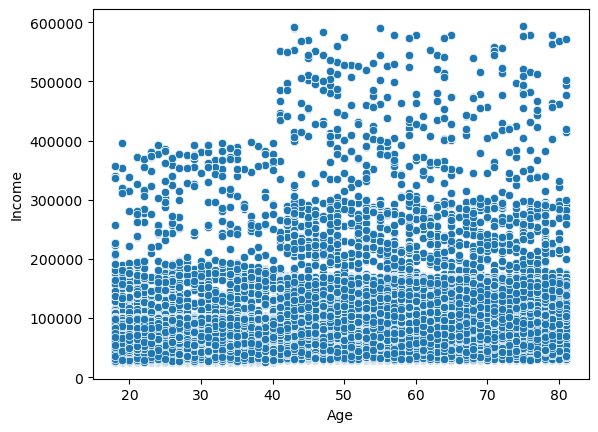

In [50]:
#creating a scatterplot of 'Age' and 'Income'
scatter = sns.scatterplot(x='Age', y='Income', data=small)

The scatter plot shows that the older users over 40 can have much stronger incomes by a large amount. There are many users that are still relatively low income across all ages but the 40+ group can have an abundance of money.

In [52]:
#this comand saves the figure listed above
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_scatter.png'))